<img align="right" width="240" height="240" src="img/HS_Mu__nchen_Logo.png"/>

<style>
p.small {
  line-height: 1;
}
</style>
<body>
    
<p class="small"> <b>Geoinformatics | Course Remote Sensing (1)</b><br> <small>Schmitt | Ulloa</small><br> <small>Summer Semester 2020</small><br></p>

<h1>Practice 7: Creation of maps and Pre-processing of raster data I</h1>

<h2>Overview</h2>

<p class="main"><b>Objectives:</b> Create a cartographic map using your classification GeoTIFF results. Explore some pre-processing functions for raster data.</p>

<p><b>Data:</b> For this practice, use the following files: </p>

<p class="data"></p>
<ul>
    <li> Raster files:</li>
    <ul>
        <li> Sentinel 2-A subset images from previous practices (See Practice 2).</li>
        <li> Sentinel 2-A TCI subset, S2A_L2A_T32UPU_TCI.tif (See Practice 2).</li>
        <li> Sentinel 2-A radiometric corrected bands 2, 3, 4, 8.</li>
        <li> Classification:  GeoTIFF raster with the classification result using either RF or MD (See Practice 5).</li>  
    </ul> 
    <li> Vector file: shapefiles of the various AOIs from previous practices (See Practice 3).</li>
</ul>

<p><b>Tasks:</b> load your classification raster in QGIS to create a map for presenting your results. In Python, use the diverse Sentinel-2A images and vector files to learn about some pre-processing functions, like crop, stacking, and data streching. These tools will also help you to present your data with the right properties in an article.</p> 

<img align="center" src="img/img_p7_wf.png" width="900"/>

<h2>Procedure</h2>

<h3>In QGIS: create map</h3>

1. Open QGIS and load your classification raster file. 

<img align="center" src="img/img_p7_karte1.png" width="900"/>

2. Under Project > NewPrintLayout you will open a new interface that will allow you to create a map.  Give a name to your map. 

<img align="center" src="img/img_p7_karte2.png" width="900"/>

3. You will find many tools that will help you with the map elaboration. Here you find a short summary of them:   
    - Add Map > draw area of where your map will be included  
    - Select/Move item > define size of the map and position  
    - Move item content > move map inside of working area  
    - Add Legend > Pay attention to Legend Properties. Select relevant layers. Change name to classification layer. Pay attention to "Auto upadate" feature. If you edit the names on the raster settings, it will be updated on the map as well.   
    - Adds a new label to the layout > to add titles and subtiles.   
    - Select map and Item Properties > Grids > + > Modify grid: coordinates, CRS, appearance, etc.   
    - Add a new picture to the layout > for adding a new picture like the HM logo. On Picture properties select file. If you want to add a North Arrow, go to "Search Directories"  
    - Add Map, and repeat for adding a second layer to the map  
    - Layout > Export

<img align="center" src="img/img_p7_karte3.png" width="900"/>

More information: 
https://docs.qgis.org/3.10/en/docs/user_manual/print_composer/overview_composer.html

<img align="center" src="img/img_p7_karte4.png" width="900"/>

4. Once your map contains all relevant elements, you can export it as a PDF or image. I suggest PNG format for the latter.  
This map can be loaded afterwards in Word or LaTeX for the article. 

<h3>In Python: Pre-processing of raster files</h3>

#### A. Create a RasterStack

5. Load the single bands 2, 3, 4 and 8 of the Sentinel-2A product 

In [1]:
# path where my data is located
folder_src = r"C:\Users\ulloa-to\git\geoinformatics_hm\data\p7"

In [2]:
import os

# this command pastes the path to your file (defined by 'folder_src') and the name of your file
# since my raster is located in a subfolder 'raster', I include it as well 
s2_b2_file = os.path.join(folder_src,'raster/s2_L2A_b2_nan.tif')
s2_b3_file = os.path.join(folder_src,'raster/s2_L2A_b3_nan.tif')
s2_b4_file = os.path.join(folder_src,'raster/s2_L2A_b4_nan.tif')
s2_b8_file = os.path.join(folder_src,'raster/s2_L2A_b8_nan.tif')

file_list = [s2_b2_file, s2_b3_file, s2_b4_file, s2_b8_file]
# print the output
file_list 

['C:\\Users\\ulloa-to\\git\\geoinformatics_hm\\data\\p7\\raster/s2_L2A_b2_nan.tif',
 'C:\\Users\\ulloa-to\\git\\geoinformatics_hm\\data\\p7\\raster/s2_L2A_b3_nan.tif',
 'C:\\Users\\ulloa-to\\git\\geoinformatics_hm\\data\\p7\\raster/s2_L2A_b4_nan.tif',
 'C:\\Users\\ulloa-to\\git\\geoinformatics_hm\\data\\p7\\raster/s2_L2A_b8_nan.tif']

6. Visualize one of the bands. 

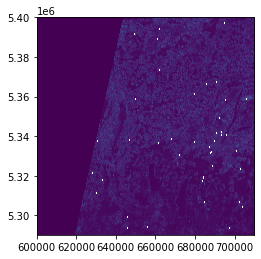

<AxesSubplot:>

In [3]:
import rasterio
from rasterio.plot import show

s2_b4 = rasterio.open(s2_b4_file)

show(s2_b4)

7. Check the metadata of the band chosen.

In [4]:
s2_b4.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 5400000.0)}

8. What can you see in the image? (use QGIS to help yourself if needed) 

A raster band from Sentinel 2. Red band

9. Describe in words which area covers this image

The area southern on Munich

10. Use all the bands to create a Rasterstack and export it

In [5]:
# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open(os.path.join(folder_src,'s2_rasterstack_b2348.tif'), 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

11. Open your rasterstack in Python, using the os.path.join() and rasterio.open() functions

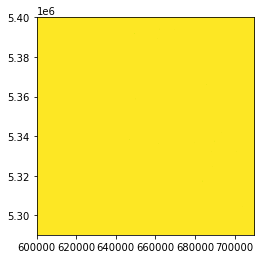

<AxesSubplot:>

In [6]:
# Open the rasterstack in Python
path_s2 = os.path.join(folder_src,'raster/s2_rasterstack_b2348.tif')
s2_file = rasterio.open(path_s2)

show(s2_file)

12. Read the metadata using the function meta()

In [7]:
# read overview of metadata
s2_file.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 10980,
 'height': 10980,
 'count': 4,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 5400000.0)}

13. Using the functions from the rasterio package. Extract information about the extent, pixel values and dimensions of the image

In [8]:
#Number of Bands
s2_file.count
print("The number of bands is:", s2_file.count)

# Dimensions
#Bounding Box
b = s2_file.bounds
#width
w = s2_file.width
#height
h = s2_file.height
#Resolution
horizontal_res = (b[2] - b[0]) / w
print("The boundaries of the raster are:", b, "\nWidth:", w, "\nHeight:", h, "\nResolution:", horizontal_res)

#Coordinate Reference System
s2_file.crs
print("The CRS of the raster is: {}".format(s2_file.crs))


import numpy as np # math and array handling

#Navigate through Band(s)
#indexes of bands
s2_file.indexes
ir_band = s2_file.read(3)
# (Numpy) Format
{i: dtype for i, dtype in zip(s2_file.indexes, s2_file.dtypes)}
#uint8 := 0..255
ir_band
np.min(ir_band)
np.max(ir_band)
#Pixel value

print("Minimum pixel value:", np.min(ir_band))
print("Maximum pixel value:", np.max(ir_band))

The number of bands is: 4
The boundaries of the raster are: BoundingBox(left=600000.0, bottom=5290200.0, right=709800.0, top=5400000.0) 
Width: 10980 
Height: 10980 
Resolution: 10.0
The CRS of the raster is: EPSG:32632
Minimum pixel value: -3.4028235e+38
Maximum pixel value: 1.0


14. What do the values of the axes mean?

The image loaded in Nr.11 with the rasterio package plots the raster with coordinates in the axis. However, if the image is loaded with the numpy package (Nr. 24), the plot is a matrix of pivel values with number of rows and columns in the axis.

15. Which bands are being plotted here? 

Bands 2, 3, 4, 8 of Sentinel - 2

#### B. Crop a RasterStack

The TCI image is quite big, which makes it more difficult to perform analysis. We will crop it at the shape of the vector file 'id_3.shp' 

16. First, load the raster file, using the os.path.join() and rasterio.open() functions

In [9]:
# Open the rasterstack in Python
s2_tci_path = os.path.join(folder_src,'raster/S2A_L2A_T32UPU_TCI.tif')
s2_tci = rasterio.open(s2_tci_path)

s2_tci.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 2692,
 'height': 1797,
 'count': 3,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(9.998601622163715, 0.0, 659806.2543206315,
        0.0, -10.001270274111342, 5323646.662999724)}

17. Plot the TCI. Use the function show() from rasterio

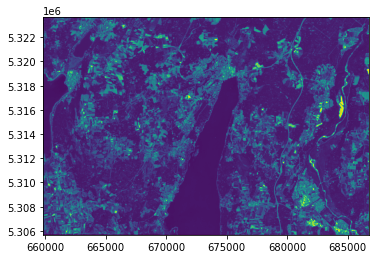

<AxesSubplot:>

In [10]:
show(s2_tci.read(1), transform=s2_tci.transform)

18. Second, load the vector file, using the function 'read_file' from geopandas. Afterwards, check the coordinate reference system.

In [11]:
import geopandas as gp

#Read Shapefile
shape_path = os.path.join(folder_src, "vector/id_3.shp")
shapefile = gp.read_file(shape_path)

#Check the projection of the shapefile
shapefile.crs

<Projected CRS: PROJCS["ETRS89_UTM_zone_32N",GEOGCS["ETRS89",DATUM ...>
Name: ETRS89_UTM_zone_32N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

19. Plot the shapefile alone and afterwards, on top of the TCI. Use matplotlib.pyplot

Text(0.5, 1.0, 'Shapefile Crop Extent')

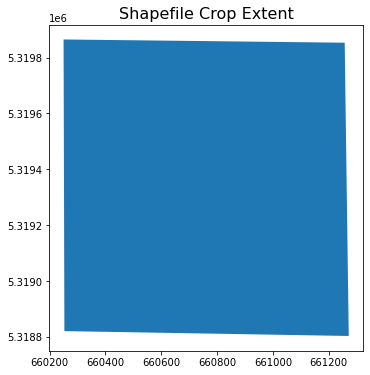

In [12]:
from rasterio.plot import show
import matplotlib.pyplot as plt # nickname
%matplotlib inline

# plot shapefile

fig, ax = plt.subplots(figsize=(6, 6))
shapefile.plot(ax=ax)
ax.set_title("Shapefile Crop Extent", fontsize=16)

20. Plot the shapefile on top of the TCI raster. 

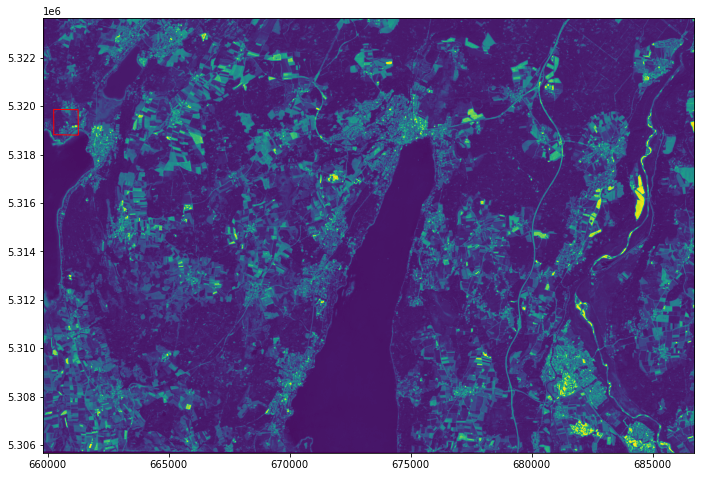

In [13]:
#Plot
fig, ax = plt.subplots(figsize  = (12, 8))
#Plot Raster
show(s2_tci, ax=ax)
# Plot Shapefile
shapefile.plot(color='none', edgecolor = 'red', ax = ax, alpha=1)
plt.show()

21. Finally, crop the raster to the shape of the shapefile.

In [14]:
import fiona
import rasterio
import rasterio.mask

with fiona.open(shape_path, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    

In [15]:
with rasterio.open(s2_tci_path) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

In [16]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(os.path.join(folder_src,"raster/TCI_subset.tif"), "w", **out_meta) as dest:
    dest.write(out_image)

21. Visualize your results. Plot the output of the cropping function. You might need to load the raster into Python using the rasterio module. 

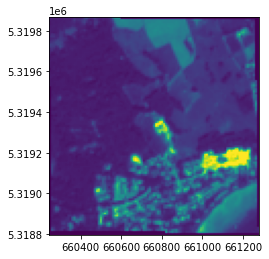

<AxesSubplot:>

In [17]:
# Open the cropped rasterstack in Python
crop_path = os.path.join(folder_src,'raster/TCI_subset.tif')
crop_tci = rasterio.open(crop_path)

# plot
show(crop_tci)

22. Check the metadata of the cropped TCI

In [18]:
crop_tci.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 103,
 'height': 107,
 'count': 3,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(9.998601622163715, 0.0, 660246.1927920067,
        0.0, -10.001270274111342, 5319866.18283611)}

23. Compare the metadata from TCI and cropped TCI. Which parameters changed? 

The height and width (number of rows and columns), and the 'transform' parameter, which refers to the coordinates of the bounding box.

#### C. Stretching of the data

Often are the images is not easy to see, and therefore we would need to perfom an streching of the pixels values. This doesn't change the pixel values of the image, it is just a visualization measure.   

For the stretching, we will use the package skimage from scikit. The data input should be in numpy arrays. Therefore, we will first adapt the image into numpy arrays before stretching the data. 

For more information on image stretching: https://scikit-image.org/docs/dev/api/skimage.exposure.html

24. Load raster file S2A_L2A_T32UPU_rstck_id1.tif as an array. Check the dimensions of the file using shape. 

In [19]:
from osgeo import gdal, ogr, gdal_array # I/O image data
import numpy as np # math and array handling

# indicate path of image to load
id1_path = os.path.join(folder_src,'raster/S2A_L2A_T32UPU_rstck_id1.tif')

In [20]:
# open the id1 raster in gdal 
img_ds = gdal.Open(id1_path, gdal.GA_ReadOnly)

img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))
for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
# check shape
img.shape

(76, 94, 4)

25. Perform diverse stretching on the images and plot them

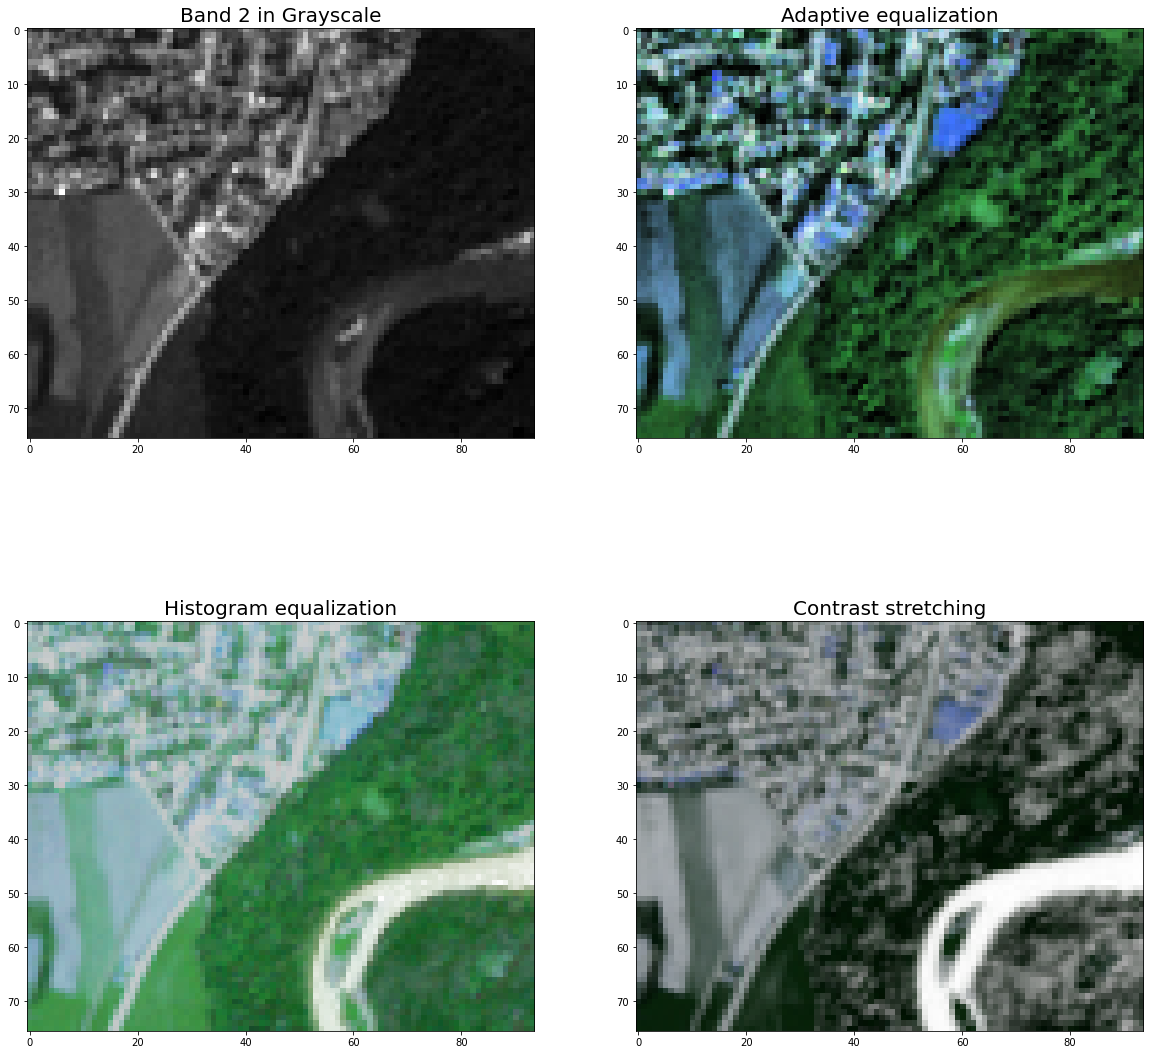

In [21]:
from skimage import data, exposure, img_as_float

# Define the size of the graphs
fig = plt.figure(figsize=(20,20))
# Define the spacing among graphs
fig.tight_layout(pad=4.0)

plt.subplot(221)
plt.imshow(img[:, :, 0], cmap=plt.cm.Greys_r)
plt.title("Band 2 in Grayscale", fontsize=20)

# Adaptive Equalization
plt.subplot(222)
plt.imshow(exposure.equalize_adapthist(img, clip_limit=0.03))
plt.title('Adaptive equalization', fontsize=20)

# Equalization
plt.subplot(223)
plt.imshow(exposure.equalize_hist(img))
plt.title('Histogram equalization', fontsize=20)

# Contrast stretching
plt.subplot(224)
p2, p98 = np.percentile(img, (2, 98))
plt.imshow(exposure.rescale_intensity(img, in_range=(p2, p98)))
plt.title('Contrast stretching', fontsize=20)

# show your plots. This command has to be run only once.
plt.show()

26. Which one would be your preferred method? Discuss using the documentation provided in scikit: https://scikit-image.org/docs/dev/api/skimage.exposure.html

The advantage of adaptive equalization is that many histograms are calculated from subsets of the image, improving the contrast. In comparison, the histogram equalization stretches the image based on one histogram of the whole image, which not necessarily improves the contrast. The disadvantage of adaptive equalization is that noise could also be enhanced. The rescale of the intensity, performs an stretching of the data getting rid of the extremes. These have to be set by the user. It changes the distribution of the pixel values, and the values considered in the image. In conclusion, these methods have pros and cons, and it is better to use the one that suites better each image. There is no universal rule.  

<div style="text-align: right"> <small>This tutorial was prepared with the support from Gabriel Cevallos. June 2020</small> </div>